In [54]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt

In [31]:
iris = datasets.load_iris() #loading iris dataset
print(iris.data.shape[0]) #total number of datapoints
print(iris.data.shape[1]) #total number of features

# printing first 5 rows of datapoints
print(iris.data[0:5,:])
print(iris.target[0:5])
(unique, counts) = np.unique(iris.target, return_counts=True) #counting datapoints for each class
print (np.asarray((unique, counts)).T) #so they are equal datapoints for each class

150
4
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
[[ 0 50]
 [ 1 50]
 [ 2 50]]


In [32]:
X=iris.data[:,0:4] #first four features are the dependant variables/features
Y=iris.target[:] #class labels of each datapoints

print(X[0:5])
Y=Y.reshape(Y.shape[0],1)
print(Y.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
(150, 1)


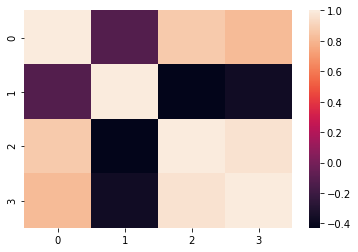

In [33]:
sn.heatmap(np.corrcoef(iris.data.T)) #below heatmap confirms correlation of parameters with each other for example feature 0 has strong correlation with 2

In [34]:
dataset = pd.DataFrame({'F1': X[:, 0], 'F2': X[:, 1],'F3': X[:, 2], 'F4': X[:, 3], 'Class': Y[:,0] }) #converting data into dataframe just for more better results output

In [60]:
dataset.shape

(150, 5)

In [35]:
dataset.head(5)

,F1,F2,F3,F4,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
Class1= X[0:49,:] # segregation of data 
Class2= X[50:99,:]
Class3= X[100:149,:]
c= np.append(X,Y,axis=1)
a=dataset[dataset["Class"]==0]
asd=a.iloc[0:4:,0:4] # outputinh first 4 datapoints for 0 class
print(asd)

    F1   F2   F3   F4
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2


In [37]:
mean1=np.mean(Class1,axis=0,keepdims=True) # evaluating mean for each class
mean2=np.mean(Class2,axis=0,keepdims=True)
mean3=np.mean(Class3,axis=0,keepdims=True)

SW1= np.dot((Class1-mean1).T,(Class1-mean1)) #calculating SW for each class nxn matrice
SW2= np.dot((Class2-mean2).T,(Class2-mean2))
SW3= np.dot((Class3-mean3).T,(Class3-mean3))
SW=SW1+SW2+SW3 # within class matrice for 3 classes d=4, c=3
print(SW)

[[38.41632653 13.65469388 24.26836735  5.47979592]
 [13.65469388 16.94367347  8.12959184  4.80918367]
 [24.26836735  8.12959184 26.98408163  6.16040816]
 [ 5.47979592  4.80918367  6.16040816  6.10163265]]


In [38]:
# now findining between class matrice
overall_mean=np.mean(X,axis=0, keepdims=True)
SB1= np.dot((mean1-overall_mean).T,(mean1-overall_mean))
SB2= np.dot((mean2-overall_mean).T,(mean2-overall_mean))
SB3= np.dot((mean3-overall_mean).T,(mean3-overall_mean))
SB=50*(SB1+SB2+SB3) # within class matrice for 3 classes d=4, c=3
print(SB)

[[ 64.30310218 -20.21055838 166.92757754  72.02260961]
 [-20.21055838  11.46414816 -57.664525   -23.09245137]
 [166.92757754 -57.664525   438.63594527 187.43718487]
 [ 72.02260961 -23.09245137 187.43718487  80.71295852]]


In [81]:
# finding SW-1SB
a=np.dot(np.linalg.inv(SW),SB)
w,v=np.linalg.eig(a)
print(w) #eigen values. It can be seen first eigen value is most significant
print("Percentage of data variation captured by first eigen vector "+ str(w[0]*100/sum(w))+"%")
print("Percentage of data variation captured by second eigen vector "+ str(w[1]*100/sum(w))+"%")

print(v) #eigen vector column for each eigen value

[3.25806148e+01 2.89489216e-01 8.85528130e-15 1.62935496e-04]
Percentage of data variation captured by first eigen vector 99.11880195135986%
Percentage of data variation captured by second eigen vector 0.8807023559932983%
[[-0.19532813  0.01589451  0.07408783  0.72458009]
 [-0.39401373  0.57619863 -0.36197221 -0.43591093]
 [ 0.54351026 -0.25953125 -0.42819253 -0.45343361]
 [ 0.71498021  0.77484581  0.82470496  0.28171497]]


In [115]:
v[:,0:2]

array([[-0.19532813,  0.01589451],
       [-0.39401373,  0.57619863],
       [ 0.54351026, -0.25953125],
       [ 0.71498021,  0.77484581]])

In [87]:
#so lets convert our original dataset 150x4 into 150x2 (choosing first 2 eigen vector)
X_revised=np.dot(iris.data,v[:,0:2]).reshape(150,2)
X_revised.shape

(150, 2)

In [92]:
X_revised[0:3]
# np.append(X_revised, iris.target,axis=0)

array([[-1.47131113,  1.88938261],
       [-1.23523864,  1.59810439],
       [-1.32932678,  1.73611834]])

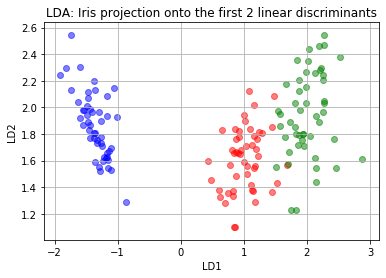

In [114]:
for label,color in zip(range(0,3),('blue', 'red', 'green')):
    plt.scatter(x=X_revised[:,0][iris.target == label], y=X_revised[:,1][iris.target == label],
                color=color, alpha=0.5,label=label)

plt.xlabel('LD1')
plt.ylabel('LD2')

plt.title('LDA: Iris projection onto the first 2 linear discriminants')

#     # hide axis ticks
plt.grid()
plt.show()
# below graph can shows we have done pretty good job in seperating except few points